# Model Selection and Boosting

# k-Fold Cross Validation

- hyperparameter - user definied parameters. It can be improved!
- Variance problem - our test set can have different from the training set (k-fold aim to solve that)
- Split evaluations into the testing set (n-iterations corresponding to n-folds defined by the user | each time one part will be test set and the rest is going to be for training)

In [144]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [145]:
dataset=pd.read_csv(r"../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New" \
                    "/Part 3 - Classification\Section 14 - Logistic Regression/Social_Network_Ads.csv")

# # Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object

# # filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

# # import labelencoder
from sklearn.preprocessing import LabelEncoder

# # instantiate labelencoder object
le = LabelEncoder()

dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))

X=dataset.iloc[:,2:4].values
y=dataset.iloc[:,-1].values

X_col = dataset.columns[2:4]

# # Splitting training and testing
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=0.2, random_state=0)

# # # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
X=sc_X.transform(X)

#Applying PCA
# from sklearn.decomposition import PCA
# PCA=PCA(n_components=2)
# X_train = PCA.fit_transform(X_train)
# X_test= PCA.transform(X_test)
# explained_variance= PCA.explained_variance_ratio_


In [158]:
classifier= SVC(C=10, kernel='rbf', gamma=0.5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


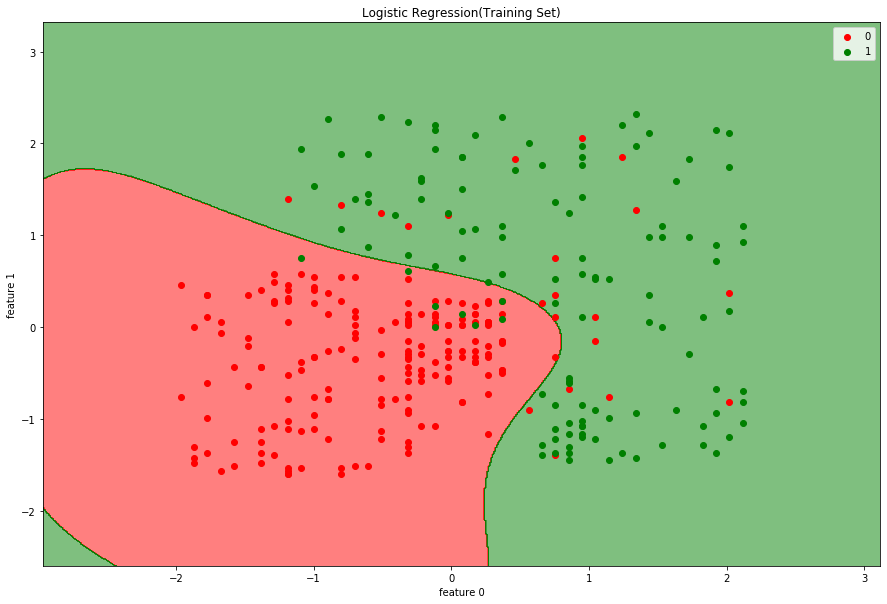

In [159]:
from matplotlib.colors import ListedColormap

figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_train[:,0].min() -1, stop= X_train[:,0].max() +1, step = 0.01),
                     np.arange(start= X_train[:,1].min() -1, stop= X_train[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train== j,0], X_train[y_train==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Logistic Regression(Training Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


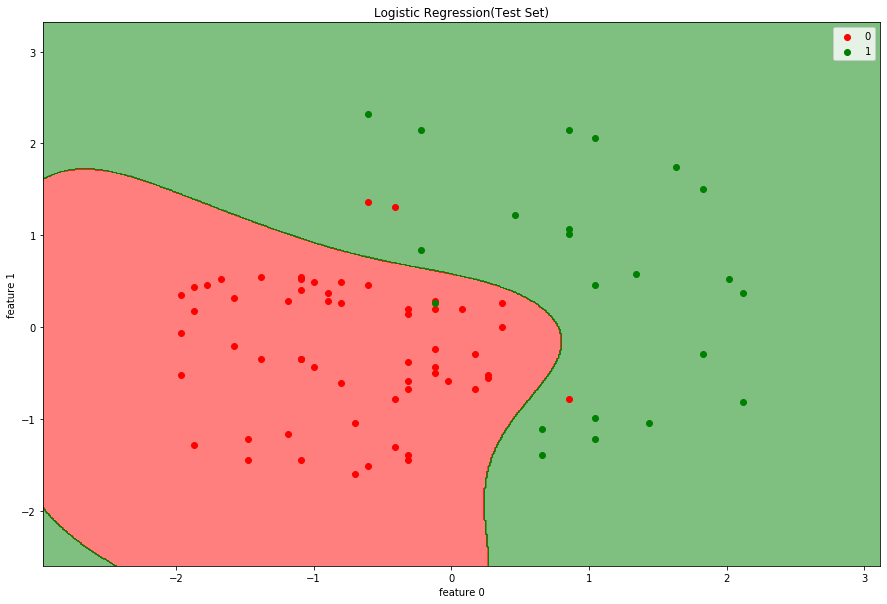

In [160]:
figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
                     np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test== j,0], X_test[y_test==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Logistic Regression(Test Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

In [162]:
# #Splitting data into X (features) and y (results)
# X=dataset.iloc[:,:-1].values
# y=dataset.iloc[:,-1].values

# # Splitting training and testing
# from sklearn.model_selection import train_test_split as tts
# X_train, X_test, y_train, y_test= tts(X,y, test_size=0.25, random_state=0)

# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X=StandardScaler()
# X_train=sc_X.fit_transform(X_train)
# X_test=sc_X.transform(X_test)

# from sklearn.linear_model import LogisticRegression

# classifier= LogisticRegression()
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)

#Visualizing the score result
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix

df_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['MODEL_1','MODEL_2'
                                                                      ], index = ['DATA_1','DATA_2'])


from IPython.display import HTML
s  = '<script type="text/Javascript">'
s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
s += 'win.document.body.innerHTML = \'' + df_confusion.to_html().replace("\n",'\\') + '\';'
s += '</script>'

# Show in new Window
HTML(s)

Training set score:0.909
Test set score:0.950


In [150]:
# Apply k-Fold Cross Validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier, X= X_train,y=y_train, cv=10)

Text(0.5, 0, 'fold')

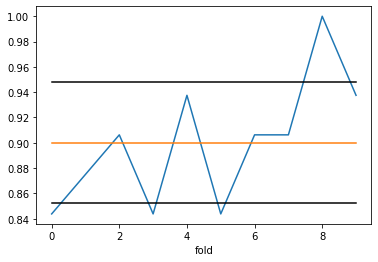

In [151]:
plt.plot(accuracies)
plt.plot(np.ones(len(accuracies))*np.mean(accuracies))
plt.plot(np.ones(len(accuracies))*(np.mean(accuracies)+np.std(accuracies)),'black')
plt.plot(np.ones(len(accuracies))*(np.mean(accuracies)-np.std(accuracies)),'black')
plt.xlabel('fold')

# Grid Search

In [152]:
#same dataset
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [153]:
# Applyng Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV
parameters=[{'C': [1,10,100,1000], 'kernel':['linear']},
           {'C': [1,10,100,1000], 'kernel':['rbf'], 'gamma':[0.5,0.1,0.01,0.001, 0.0001]}]
grid_search=GridSearchCV(estimator=classifier, param_grid=parameters, scoring = 'accuracy', cv=10, n_jobs=-1)

In [154]:
grid_search = grid_search.fit(X_train, y_train)

In [164]:
best_accuracy=grid_search.best_score_
best_params=grid_search.best_params_

print('Best Accuracy:{}\nBest model:{}'.format(best_accuracy,best_params))

Best Accuracy:0.903125
Best model:{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


# XGBoost